### Imports

In [1]:
import numpy as np
import matplotlib as plt

### Code

In [2]:
def make_clusters(X, centroids, k):
    clusters = {}
    for i in range(k):
        clusters[i]= []
    for data in X:
        euc_dist = []
        for j in range(k):
            euc_dist.append(np.linalg.norm(data - centroids[j]))

        clusters[euc_dist.index(min(euc_dist))].append(data)

    return clusters

def recalculate_centroids(centroids, clusters, k):
    for i in range(k):
        centroids[i] = np.average(clusters[i], axis = 0)
    return centroids

In [39]:
class Kmeans:
    def __init__(self, X, k):
        self.X = X
        self.k = k

    def fit(self, n):
        X = self.X
        k = self.k
        dims = len(X[0])
        centroids = X[:k].copy()
        for i in range(n):
            clusters = make_clusters(X, centroids,k)
            centroids = recalculate_centroids(centroids, clusters, k)

        self.centroids = centroids
        self.labels = self.predict(X)

        return self
    
    def predict(self, new):
        k = self.k
        centroids = self.centroids
        min_cluster_id_lst = []
        for n in new:
            euc_dist = []

            for j in range(k):
                euc_dist.append(np.linalg.norm( n - centroids[j]))

            min_ = np.argmin(euc_dist)
            min_cluster_id_lst.append(min_)
        return min_cluster_id_lst
    

### Test

In [64]:
X = np.random.rand(200, 2)
k = 5
iter = 10

In [65]:
kmeans = Kmeans(X, k)

In [66]:
kmeans.fit(iter)

In [67]:
c = kmeans.centroids
c

array([[0.22520495, 0.81756175],
       [0.19580359, 0.26347646],
       [0.67013363, 0.42856466],
       [0.73973986, 0.77526602],
       [0.75338494, 0.12502335]])

In [71]:
label = kmeans.labels
print(label)

[0, 1, 2, 3, 1, 3, 3, 2, 1, 2, 1, 3, 4, 1, 0, 1, 4, 0, 2, 3, 2, 0, 2, 2, 3, 3, 0, 0, 4, 2, 4, 3, 4, 3, 1, 0, 3, 1, 2, 1, 1, 1, 0, 2, 2, 3, 3, 4, 2, 4, 3, 3, 2, 4, 3, 2, 2, 3, 4, 2, 4, 4, 2, 4, 0, 3, 0, 1, 1, 1, 4, 3, 1, 2, 0, 2, 3, 1, 3, 0, 2, 2, 1, 4, 3, 1, 3, 0, 1, 3, 2, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0, 4, 4, 0, 0, 3, 0, 1, 1, 4, 4, 1, 3, 4, 1, 3, 0, 2, 4, 4, 2, 4, 1, 3, 3, 0, 3, 3, 2, 3, 2, 3, 4, 0, 0, 3, 0, 1, 1, 0, 4, 0, 1, 1, 2, 2, 0, 3, 2, 1, 0, 1, 1, 3, 4, 4, 2, 1, 4, 4, 0, 4, 0, 3, 0, 4, 1, 4, 3, 4, 0, 3, 2, 4, 4, 1, 4, 2, 3, 1, 0, 2, 3, 2, 3, 2, 1, 2, 2, 4, 3, 2, 2, 2, 3, 3, 1, 3]


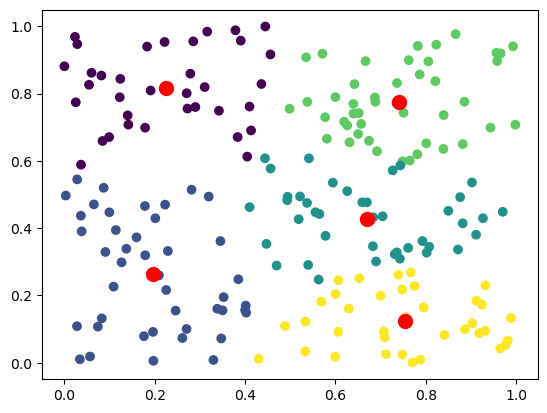

In [81]:
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=label)
ax.scatter(c[:,0], c[:,1], color="red", s=100)